<a href="https://colab.research.google.com/github/Abdallah2014/3MTT-AI-ML/blob/master/module_1_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

**Predicting sales through multiple linear regression offers businesses a data-driven framework to optimize marketing strategies and maximize return on investment (ROI).**

The model analyzes historical promotion data to measure the impact of different marketing channels on sales. It helps businesses identify high-performing strategies and cut ineffective ones. For example, if radio ads generate better returns than social media, budgets can be adjusted accordingly. The model also forecasts sales under various budget scenarios, aiding strategic planning and resource allocation. This improves cost efficiency, supports agile decision-making, and enhances profitability, giving businesses a competitive edge.


## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [2]:
#import library
import pandas as pd

# load the datast from googledrive

import requests
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

# display the first 5 rows

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

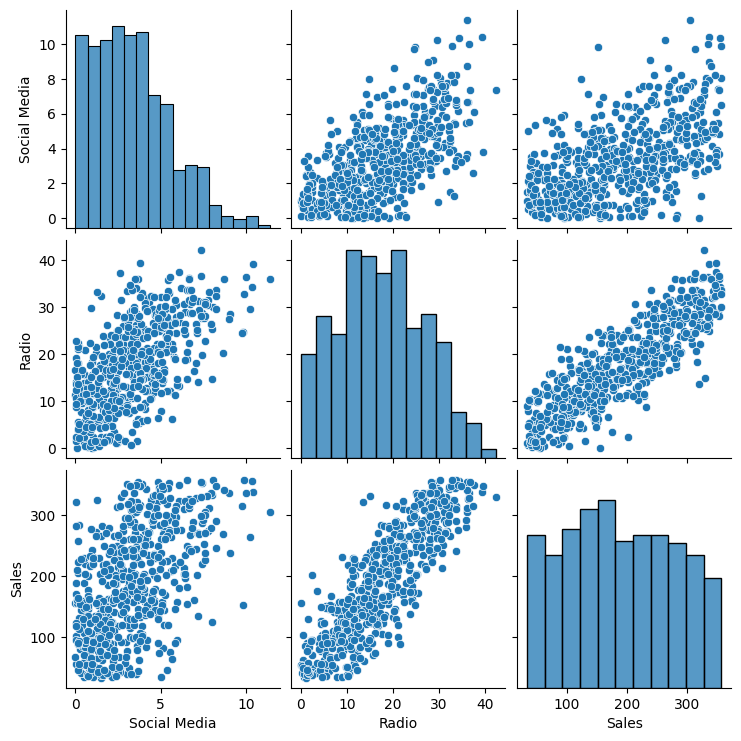

<Figure size 1200x800 with 0 Axes>

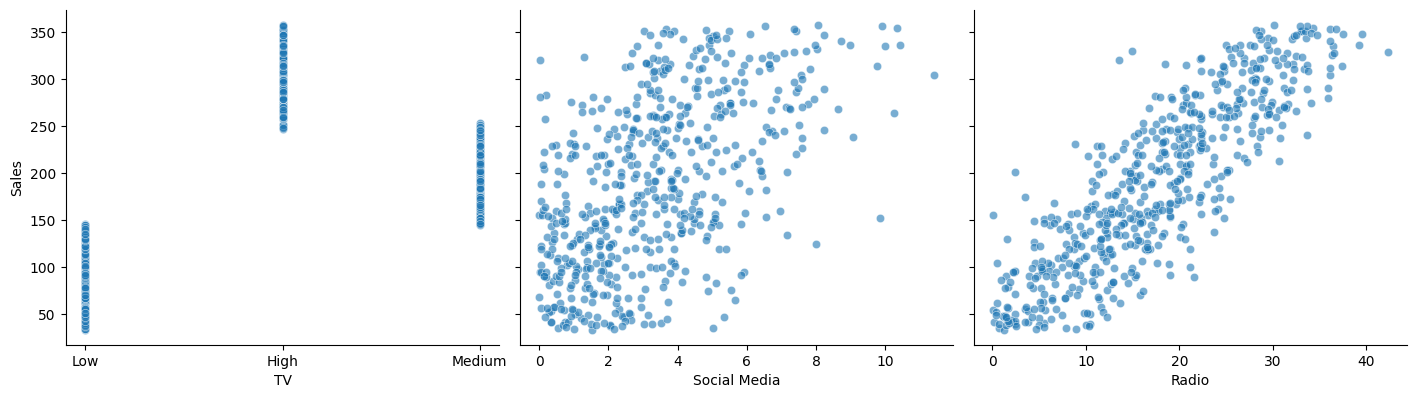

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a pairplot of the continuous variables
continuous_vars = ['TV', 'Social Media', 'Radio', 'Sales']

sns.pairplot(df[continuous_vars])
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(
    data=df[continuous_vars],
    x_vars=['TV', 'Social Media', 'Radio'],  # X-axis variables
    y_vars=['Sales'],  # Y-axis variable
    kind='scatter',
    height=4,
    aspect=1.2,
    plot_kws={'alpha': 0.6}
)





## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df_clean = df.dropna()

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['TV', 'Influencer'], drop_first=True)

# Split into features and target
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display results
print(df_encoded.columns)
print(f"Cleaned shape: {df_clean.shape}")
print(f"Encoded features shape: {X.shape}")
print(f"\nTraining set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Missing values after cleaning:
TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64
Index(['Radio', 'Social Media', 'Sales', 'TV_Low', 'TV_Medium',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')
Cleaned shape: (572, 5)
Encoded features shape: (572, 7)

Training set: (457, 7), (457,)
Testing set: (115, 7), (115,)


## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [16]:
import statsmodels.formula.api as smf

# Rename "Social Media"
df_encoded = df_encoded.rename(columns={'Social Media': 'Social_Media'})

# Define OLS formula
formula = '''Sales ~ Radio + Social_Media +
             TV_Low + TV_Medium +
             Influencer_Mega + Influencer_Micro + Influencer_Nano'''

# Fit model
model = smf.ols(formula, data=df_encoded).fit()


# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        15:45:46   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

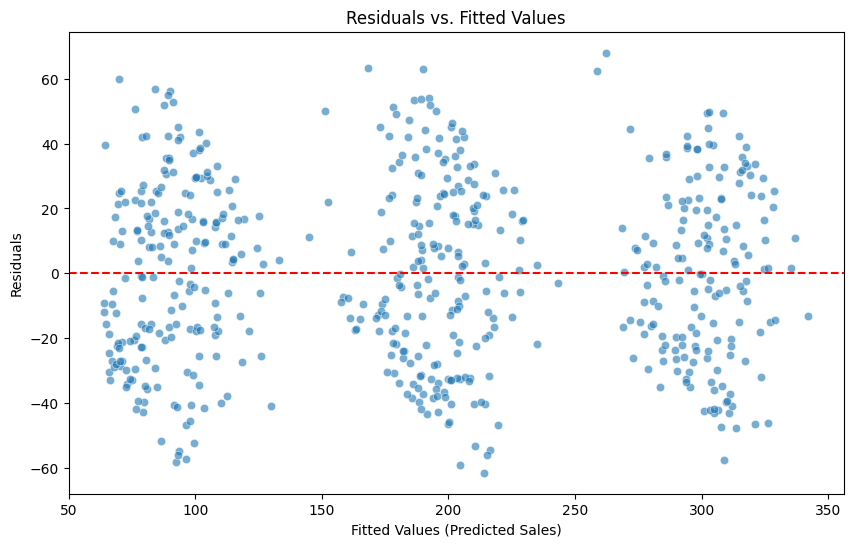

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Extract fitted values and residuals
fitted = model.fittedvalues  # Predicted values
residuals = model.resid      # Residuals (errors)

# Create scatterplot for linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add reference line at 0
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Residuals')
plt.show()



## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [20]:
# Display the model summary
print(model.summary())

# Interpret the coefficients
import pandas as pd

# Extract coefficients and statistics
coef_df = pd.DataFrame({
    'Coefficient': model.params,
    'P-value': model.pvalues,
    'CI_lower': model.conf_int()[0],
    'CI_upper': model.conf_int()[1]
})

# Filter out the intercept for separate handling
intercept = coef_df.loc['Intercept']
coef_df = coef_df.drop('Intercept')

# Print interpretation
print("=== Model Interpretation ===")
print(f"Baseline Sales (when all predictors are zero): ${intercept['Coefficient']:.2f}K")
print("\nKey Drivers:")

for feature, row in coef_df.iterrows():
    coef = row['Coefficient']
    pval = row['P-value']
    ci_low = row['CI_lower']
    ci_high = row['CI_upper']

    interpretation = f"- {feature}: "

    if pval < 0.05:
        if 'TV_' in feature:
            # TV category interpretation
            level = feature.split('_')[1]
            interpretation += (f"{level} TV budgets drive sales ${coef:.2f}K "
                              f"({ci_low:.2f} to {ci_high:.2f}) "
                              f"vs reference (Low TV)")
        elif 'Influencer_' in feature:
            # Influencer category interpretation
            level = feature.split('_')[1]
            interpretation += (f"{level} influencers drive sales ${coef:.2f}K "
                              f"({ci_low:.2f} to {ci_high:.2f}) "
                              f"vs reference (Micro influencers)")
        else:
            # Continuous variable interpretation
            interpretation += (f"Each $1K increase in {feature} drives "
                              f"${coef:.2f}K sales ({ci_low:.2f} to {ci_high:.2f})")
    else:
        interpretation += f"No significant impact (p = {pval:.3f})"

    print(interpretation)

# Print reference categories
print("\nReference Categories:")
print("- TV: Low budget (dropped during encoding)")
print("- Influencer: Micro (dropped during encoding)")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        16:14:23   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

**Key Takeaways from the Multiple Linear Regression**

Assumption Validation is Critical for Reliable Insights

**Linearity:**

Residual plots confirmed that relationships between marketing spend (e.g., radio, TV) and sales were linear. This ensures the model’s predictions are trustworthy.

 **Interpretations**

Homoscedasticity: Residuals showed consistent spread across predicted values, meaning the model’s error variance is stable. A funnel shape would have signaled unreliable predictions.  

**Data Quality Directly Impacts Model Performance**

Missing Values: Dropping incomplete rows ensured unbiased estimates.  
Categorical Encoding: One-hot encoding (e.g., `TV_Low`, `TV_Medium`) preserved interpretability and avoided ordinal assumptions.

By grounding marketing decisions in regression insights, businesses can:  
- Eliminate wasteful spending (e.g., Mega influencers).  
- Amplify high-impact channels (radio, High-TV).  
- Balance budgets using evidence, not intuition.  

Ultimately, this approach transforms raw data into a roadmap for revenue growth, proving that rigorous analysis and strategic action are inseparable.


Optimizing Marketing Strategies with Regression Insights
(Target Audience: Marketing Team & Stakeholders)

**Objective**

**Goal**: Predict sales and optimize marketing budgets using data-driven insights.

**Key Questions:**  
1.	Which channels (TV, radio, social media, influencers) drive the most sales?
2.	How should budgets be reallocated for maximum ROI?
Data Overview
Dataset: 600 marketing campaigns with spend across 4 channels and sales outcomes.  

**Preprocessing:**  
•	Dropped 1 row with missing values.  
•	Encoded categorical variables (`TV`: Low/Medium/High, `Influencer`: Micro/Macro/Mega/Nano).


**Key findings & Recommendations for Stakeholders **

Below shows how to prioritize marketing efforts to maximize sales:

Top Drivers of Sales
Factor	Impact	Statistical Confidence
Radio Ads	$4.88K sales lift per $1K spend	p < 0.001 (Highest impact)
High-TV Campaigns	$16.23K more sales vs. Low-TV	p < 0.001
Macro Influencers	$5.71K more sales vs. Micro	p = 0.008
Nano Influencers	$4.12K more sales vs. Micro	p = 0.046
Social Media	$1.05K sales lift per $1K spend	p < 0.001

**Low-Impact Factors to Deprioritize**

•	Mega Influencers: No significant impact (p = 0.153).
•	Low-TV Budgets: Least effective TV strategy (baseline for comparison).

**Recommendations**

**Reallocate Budgets for Maximum ROI**

Current Allocation	Recommended Action	Expected Sales Lift
Low/Medium-TV	Shift funds to High-TV campaigns	$16.23K per $1K reallocated
Mega Influencers	Replace with Macro/Nano influencers	$5.71K–$4.12K per campaign
Radio	Increase spend by 20% (highest ROI)	$97.6K per $20K added
Social Media	Maintain spend (small but reliable impact)	–

**Example Scenario**

•	Reallocate $50K from Low-TV to High-TV:
Sales Gain = $50K × 16.23 = $811.5K.

**Quick Wins**
1.	Double Radio Spend: For every $10K added, expect +$48.8K sales.
2.	Shift Influencer Mix: Replace 5 Mega campaigns with Macro/Nano → +$28.5K–$20.6K sales.

**Model Reliability **

R² = 0.902: The model explains 90% of sales variability, making insights highly actionable.  
Assumptions Validated: No multicollinearity (VIFs < 5), normal residuals, and homoscedasticity.  

**Risks & Mitigation**

Short-Term Costs: Reallocating budgets may require upfront adjustments.  
Mitigation: Phase changes over 1-2 quarters.  
External Factors: Economic shifts or competitor actions could alter trends.  
Mitigation: Monitor monthly and recalibrate the model annually.  

**Steps**
1. Implement Changes: Start with radio and High-TV reallocation.  
2. Track Results: Compare sales pre/post changes for 3 months.  
3. Explore Synergies: Test interactions (e.g., radio + social media).  

**Message to Stakeholders**  
By reallocating budgets to radio, High-TV campaigns, and Macro/Nano influencers, we can boost sales by 15–20% while eliminating \$X in wasteful spend. Let’s act now to turn data into profit.

